In [8]:
%reload_ext autoreload
%autoreload 2

import math
import sys
from pathlib import Path

import glob2
import numpy as np
import pandas as pd
from azureml.core import Dataset, Workspace
import matplotlib.pyplot as plt
import pickle

sys.path.append(str(Path(os.getcwd()).parent))
from data_utilities import find_outliers, convert_age_from_days_to_years, extractqrcode, draw_sex_distribution, draw_age_distribution

### read the csv and total no. of children

In [3]:
DATASET_PATH = Path('/mnt/datasets/depthmap56k')

In [11]:
! ls /mnt/datasets/depthmap56k/qrcode/c0o822wuvd/

pc_1585007906-c0o822wuvd_1591761858504_100_000.p
pc_1585007906-c0o822wuvd_1591761858504_100_001.p
pc_1585007906-c0o822wuvd_1591761858504_100_002.p
pc_1585007906-c0o822wuvd_1591761858504_100_003.p
pc_1585007906-c0o822wuvd_1591761858504_100_004.p
pc_1585007906-c0o822wuvd_1591761858504_100_005.p
pc_1585007906-c0o822wuvd_1591761858504_101_000.p
pc_1585007906-c0o822wuvd_1591761858504_101_001.p
pc_1585007906-c0o822wuvd_1591761858504_101_002.p
pc_1585007906-c0o822wuvd_1591761858504_101_003.p
pc_1585007906-c0o822wuvd_1591761858504_101_004.p
pc_1585007906-c0o822wuvd_1591761858504_101_005.p
pc_1585007906-c0o822wuvd_1591761858504_101_006.p
pc_1585007906-c0o822wuvd_1591761858504_101_007.p
pc_1585007906-c0o822wuvd_1591761858504_101_008.p
pc_1585007906-c0o822wuvd_1591761858504_101_009.p
pc_1585007906-c0o822wuvd_1591761858504_101_010.p
pc_1585007906-c0o822wuvd_1591761858504_102_000.p
pc_1585007906-c0o822wuvd_1591761858504_102_001.p
pc_1585007906-c0o822wuvd_1591761858504_102_002.p
pc_1585007906-c0o822

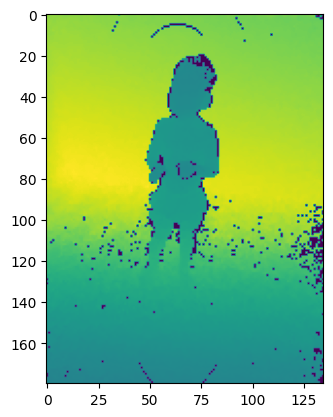

In [12]:
paths  = DATASET_PATH / 'qrcode/c0o822wuvd/pc_1585007906-c0o822wuvd_1591761858504_100_002.p'
depthmap, targets = pickle.load(open(paths, "rb"))
_ = plt.imshow(np.squeeze(depthmap))
plt.show()

In [13]:
print("targets: ", targets)
print("targets.shape: ", targets.shape)
print("depthmap.shape: ", depthmap.shape)

targets:  [79.    9.05]
targets.shape:  (2,)
depthmap.shape:  (180, 135, 1)


In [4]:
scans = pd.read_csv(DATASET_PATH / 'labels/scans.csv')
print("Total no. of children:", len(scans))
scans.head()

Total no. of children: 2106


,qrcode,person_id,age,sex,Years
0,1584997475-0195z663pl,DQKAiT6cSJkQW2ya_person_1569888000000_Dj66PtJa...,1420,male,4
1,1584999865-01t0n240ra,lD0OAaaZ0pcD0zRk_person_1570060800000_1AoTKLlT...,1529,female,4
2,1583942091-02migjdla1,ZPFkcYGhq15raY3J_person_1573603200000_lfu3HzFC...,945,female,3
3,1585011777-031jov4jpw,D7tiN7CtUEM9WoRx_person_1571270400000_Q1hKfLbv...,924,male,3
4,1585003039-032hniw434,8SMAKMkY79LovcBU_person_1570838400000_nMpSBNek...,1320,female,4


### getting the total of gender

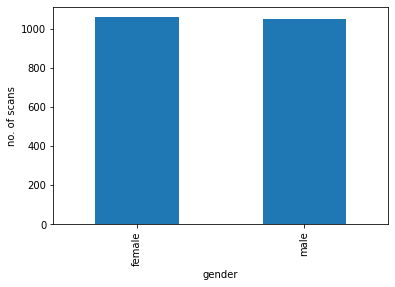

In [37]:
plt.figure()
draw_sex_distribution(scans)
plt.show()

In [5]:
#adding the Years column into dataframe
scans['Years'] = scans.apply(convert_age_from_days_to_years, axis=1)
scans.head()

,qrcode,person_id,age,sex,Years
0,1584997475-0195z663pl,DQKAiT6cSJkQW2ya_person_1569888000000_Dj66PtJa...,1420,male,3
1,1584999865-01t0n240ra,lD0OAaaZ0pcD0zRk_person_1570060800000_1AoTKLlT...,1529,female,4
2,1583942091-02migjdla1,ZPFkcYGhq15raY3J_person_1573603200000_lfu3HzFC...,945,female,2
3,1585011777-031jov4jpw,D7tiN7CtUEM9WoRx_person_1571270400000_Q1hKfLbv...,924,male,2
4,1585003039-032hniw434,8SMAKMkY79LovcBU_person_1570838400000_nMpSBNek...,1320,female,3


### plotting the bar graph no. of children against age

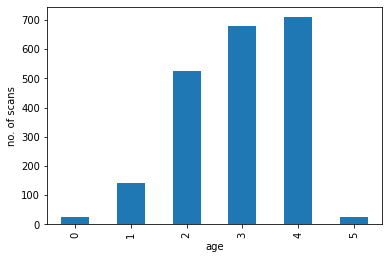

In [39]:
plt.figure()
draw_age_distribution(scans)
plt.show()

### getting the distribition based on gender

In [40]:
male = scans[scans['sex']=='male']
print('No. of male distribution: ')
print(male['Years'].value_counts())

No. of male distribution: 
4    373
3    322
2    259
1     67
0     15
5     12
Name: Years, dtype: int64


In [41]:
female = scans[scans['sex']=='female']
print('No. of female distribution: ')
print(female['Years'].value_counts())

No. of female distribution: 
3    357
4    336
2    265
1     74
5     14
0     12
Name: Years, dtype: int64


### Reading the csv files and get the data at artifacts level

In [6]:
artifacts = pd.read_csv(DATASET_PATH / 'labels/artifacts.csv')
artifacts.head()

,artifacts,id,storage_path,height,weight,key,tag,qrcode
0,pc_1584997475-0195z663pl_1591588126306_100_000...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
1,pc_1584997475-0195z663pl_1591588126306_100_001...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
2,pc_1584997475-0195z663pl_1591588126306_100_002...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
3,pc_1584997475-0195z663pl_1591588126306_100_003...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
4,pc_1584997475-0195z663pl_1591588126306_100_004...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl


In [7]:
## dropping the null values from the artifacts 
artifacts  = artifacts.dropna()

In [44]:
print("Total no. of pointclouds:", len(artifacts ))

Total no. of pointclouds: 50149


101.0    21033
100.0    14843
102.0    14246
201.0       19
202.0        8
Name: key, dtype: int64


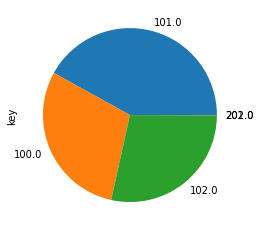

In [45]:
## keys for different scan type and their distribution in dataset
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(artifacts['key'].value_counts())
_ = artifacts['key'].value_counts().plot(kind='pie')

### plotting the height and weight distribution

In [8]:
artifacts['qrcode'] = artifacts.apply(extractqrcode, axis=1)
artifacts.head()

,artifacts,id,storage_path,height,weight,key,tag,qrcode
0,pc_1584997475-0195z663pl_1591588126306_100_000...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
1,pc_1584997475-0195z663pl_1591588126306_100_001...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
2,pc_1584997475-0195z663pl_1591588126306_100_002...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
3,pc_1584997475-0195z663pl_1591588126306_100_003...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
4,pc_1584997475-0195z663pl_1591588126306_100_004...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl


In [9]:
getheight = artifacts.drop_duplicates(subset=['qrcode']).reset_index(drop=True)
getheight.head()

,artifacts,id,storage_path,height,weight,key,tag,qrcode
0,pc_1584997475-0195z663pl_1591588126306_100_000...,DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...,qrcode/1584997475-0195z663pl/measure/159158812...,85.7,9.45,100.0,good,1584997475-0195z663pl
1,pc_1584999865-01t0n240ra_1591629837700_100_008...,lD0OAaaZ0pcD0zRk_artifact-scan-pcd_15700608000...,qrcode/1584999865-01t0n240ra/measure/159162983...,86.5,12.45,100.0,good,1584999865-01t0n240ra
2,pc_1583942091-02migjdla1_1591470015961_100_000...,ZPFkcYGhq15raY3J_artifact-scan-pcd_15736032000...,qrcode/1583942091-02migjdla1/measure/159147001...,71.6,8.10,100.0,good,1583942091-02migjdla1
3,pc_1585011777-031jov4jpw_1591815240163_100_000...,D7tiN7CtUEM9WoRx_artifact-scan-pcd_15712704000...,qrcode/1585011777-031jov4jpw/measure/159181524...,78.5,11.75,100.0,good,1585011777-031jov4jpw
4,pc_1585003039-032hniw434_1591707933084_102_000...,8SMAKMkY79LovcBU_artifact-scan-pcd_15708384000...,qrcode/1585003039-032hniw434/measure/159170793...,108.1,15.50,102.0,good,1585003039-032hniw434


In [48]:
print("Total no.unique scans:", len(getheight))

Total no.unique scans: 2106


Text(0, 0.5, 'height')

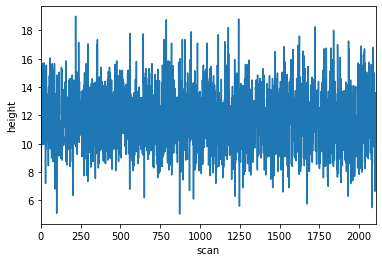

In [49]:
heightax = getheight['weight'].plot()
heightax.set_xlabel('scan')
heightax.set_ylabel('height')

Text(0.5, 0, 'weight')

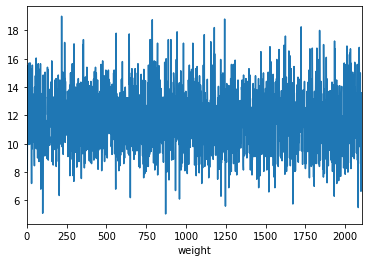

In [50]:
weightax = getheight['weight'].plot()
weightax.set_xlabel('scan')
weightax.set_xlabel('weight')

In [10]:
distribution_data = pd.merge(scans,getheight[['height','weight','qrcode']],on='qrcode', how='left')
distribution_data.head()

,qrcode,person_id,age,sex,Years,height,weight
0,1584997475-0195z663pl,DQKAiT6cSJkQW2ya_person_1569888000000_Dj66PtJa...,1420,male,3,85.7,9.45
1,1584999865-01t0n240ra,lD0OAaaZ0pcD0zRk_person_1570060800000_1AoTKLlT...,1529,female,4,86.5,12.45
2,1583942091-02migjdla1,ZPFkcYGhq15raY3J_person_1573603200000_lfu3HzFC...,945,female,2,71.6,8.10
3,1585011777-031jov4jpw,D7tiN7CtUEM9WoRx_person_1571270400000_Q1hKfLbv...,924,male,2,78.5,11.75
4,1585003039-032hniw434,8SMAKMkY79LovcBU_person_1570838400000_nMpSBNek...,1320,female,3,108.1,15.50


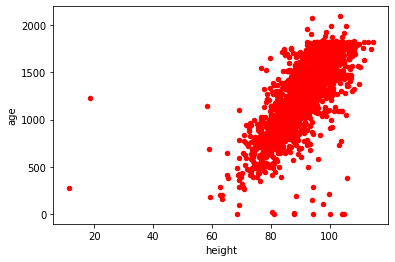

In [52]:
#distribution of height against age
height_vs_age = distribution_data.plot.scatter(x='height', y='age', c='red')

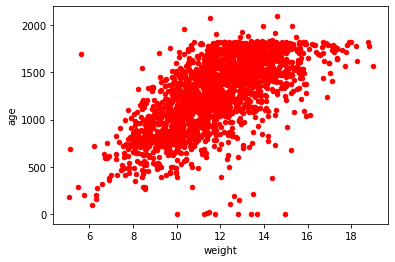

In [53]:
#distribution of weight against age
weight_vs_age = distribution_data.plot.scatter(x='weight', y='age', c='red')

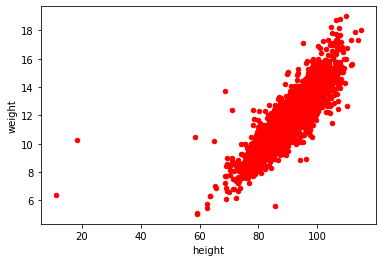

In [54]:
## distribution of height against weight
weight_vs_height = distribution_data.plot.scatter(x='height', y='weight', c='red')

## Analyze outliers: 1) age, 2) weight, 3) height

In [55]:
distribution_data.describe()

,age,Years,height,weight
count,2106.000000,2106.000000,2106.000000,2106.000000
mean,1257.966762,2.940171,90.604274,11.741541
std,375.830571,1.007445,8.960483,2.086139
min,0.000000,0.000000,11.300000,5.050000
25%,995.000000,2.000000,84.700000,10.250000
50%,1292.500000,3.000000,91.000000,11.700000
75%,1559.750000,4.000000,97.100000,13.150000
max,2094.000000,5.000000,114.700000,19.000000


In [56]:
distribution_data.head()

,qrcode,person_id,age,sex,Years,height,weight
0,1584997475-0195z663pl,DQKAiT6cSJkQW2ya_person_1569888000000_Dj66PtJa...,1420,male,3,85.7,9.45
1,1584999865-01t0n240ra,lD0OAaaZ0pcD0zRk_person_1570060800000_1AoTKLlT...,1529,female,4,86.5,12.45
2,1583942091-02migjdla1,ZPFkcYGhq15raY3J_person_1573603200000_lfu3HzFC...,945,female,2,71.6,8.10
3,1585011777-031jov4jpw,D7tiN7CtUEM9WoRx_person_1571270400000_Q1hKfLbv...,924,male,2,78.5,11.75
4,1585003039-032hniw434,8SMAKMkY79LovcBU_person_1570838400000_nMpSBNek...,1320,female,3,108.1,15.50


### 1) Check age

##### Check age < 6 months or  > 6 years

In [11]:
find_outliers(distribution_data, 'age', '<365/2', data_id_name='qr')

2021-08-05 15:31:59,969 - INFO - Running the following query: @df.age<365/2 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 68
2021-08-05 15:31:59,986 - INFO - No. of outliers: 14 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 73


['1583831904-13qoxucgul',
 '1584996554-5hc50kbv5k',
 '1583850151-7lqggqjbfz',
 '1583998466-92e41regoe',
 '1585011244-en5qxroh2d',
 '1584999538-fwlijzba3n',
 '1584993440-jt1q7jvcxk',
 '1584996982-jw4772tp4t',
 '1583997887-kjl2onswvl',
 '1583462542-nvwrue6sak',
 '1585004714-vvwdktbjr4',
 '1584921649-y7mb71gtq5',
 '1584995840-yc5e340qkf',
 '1583462523-zolqj1h1so']

In [12]:
find_outliers(distribution_data, 'age', '>365*6', data_id_name='qr')

2021-08-05 15:32:13,619 - INFO - Running the following query: @df.age>365*6 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 68
2021-08-05 15:32:13,622 - INFO - No. of outliers: 0 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 73


[]

### 2) Check weight

In [13]:
find_outliers(distribution_data, 'weight', '<5.0', data_id_name='qr')

2021-08-05 15:32:23,921 - INFO - Running the following query: @df.weight<5.0 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 68
2021-08-05 15:32:23,925 - INFO - No. of outliers: 0 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 73


[]

In [14]:
find_outliers(distribution_data, 'weight', '>30.0', data_id_name='qr')

2021-08-05 15:32:32,455 - INFO - Running the following query: @df.weight>30.0 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 68
2021-08-05 15:32:32,459 - INFO - No. of outliers: 0 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 73


[]

### 3) Check height

In [15]:
find_outliers(distribution_data, 'height', '<40.0', data_id_name='qr')

2021-08-05 15:32:41,410 - INFO - Running the following query: @df.height<40.0 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 68
2021-08-05 15:32:41,415 - INFO - No. of outliers: 2 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 73


['1583997882-3jqstr1119', '1584998372-d85ogmqucw']

In [16]:
find_outliers(artifacts, 'height', '>150.0', data_id_name='qr')

2021-08-05 15:32:50,605 - INFO - Running the following query: @df.height>150.0 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 68
2021-08-05 15:32:50,609 - INFO - No. of outliers: 0 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 73


[]

## Check on the amount of artifacts and scans from the dataset

In [ ]:
# Takes approx 12 min
dataset = glob2.glob(str(DATASET_PATH / 'qrcode/**/*.pcd'))
len(dataset)

In [ ]:
print("Total no. of pointclouds in csv:", len(artifacts))
print("Total no. of pointclouds in dataset:", len(dataset))

In [ ]:
## extracting the qrcodes
qrcodes_data = []
for path in dataset:
    data =path.split('/')
    qrcodes_data.append(data[4])
qrc_dataframe = pd.DataFrame(qrcodes_data,columns=['qrcodes'])

In [ ]:
print("Total no. of scans in dataset:", len(qrc_dataframe['qrcodes'].unique()))
print("Total no. of scans in csv:", len(scans))      